<a href="https://colab.research.google.com/github/o93/sandbox/blob/main/%E8%AA%A4%E5%B7%AE%E3%83%BB%E6%9B%96%E6%98%A7%E3%81%95%E3%83%BB%E4%B8%8D%E7%A2%BA%E3%81%8B%E3%81%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

まだ適当に試してるだけ

In [60]:
import numpy as np
import pandas as pd
import pymc3 as pm

from matplotlib import pyplot as plt
import seaborn as sns

data = np.array([
    0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
])
data = pd.DataFrame(data, columns=['cv'])
n, cv = data.shape[0], data['cv'].sum()
n, cv

(252, 11)

In [62]:
m = []
for _ in range(1000):
    s = data.sample(frac=0.5)
    m.append(s['cv'].mean())

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-69-c73d5620c545>:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, figsize=(16, 4))


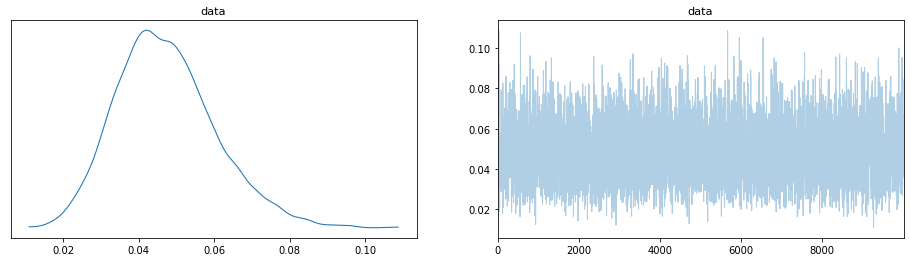

In [69]:
with pm.Model() as model:
    theta = pm.Uniform('data', lower=0, upper=1, shape=1)
    obs = pm.Binomial('DATA', p=theta, n=[n], observed=[cv])
    trace = pm.sample(10000, chains=1)
    pm.traceplot(trace, figsize=(16, 4))

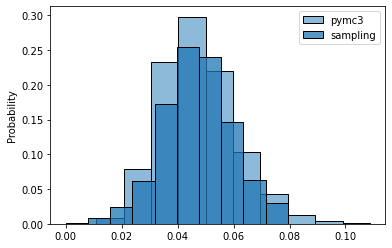

In [88]:
sns.histplot(trace['data'], bins=10, stat='probability', label='pymc3')
sns.histplot(m, bins=10, stat='probability', label='sampling')
plt.legend()
plt.show()

In [2]:

real_values = [1, 2, 3, 4, 5]
measured_values = [0.9, 2.2, 3.1, 3.9, 5.1]
predicted_values = [1.1, 2.1, 3.2, 4.8, 4.9]

def mean_absolute_error(real, predicted):
    return sum(abs(r - p) for r, p in zip(real, predicted)) / len(real)

measured_error = mean_absolute_error(real_values, measured_values)
predicted_error = mean_absolute_error(real_values, predicted_values)
measured_error, predicted_error

(0.12, 0.25999999999999995)

In [4]:
from sklearn.metrics import mean_absolute_error

measured_error = mean_absolute_error(real_values, measured_values)
predicted_error = mean_absolute_error(real_values, predicted_values)
measured_error, predicted_error

(0.12, 0.25999999999999995)